# **TPO - Mobilidad Urbana**
____
**Ciencia de Datos** - Curso I5521\
**Grupo** N°06\
**Integrantes:**
*   Bratti, Conrado Stefano
*   Biscardi, Ivo Guido
*   Rodriguez, Adan Jorge
*   Ferreyra, Nicolas

____

## Introducción - El Problema
La red de transporte público de CABA es una de las más extensas y diversas de América Latina, integrada por colectivos, subtes, trenes y sistemas complementarios como Ecobici. Sin embargo, esta infraestructura enfrenta un problema estructural que compromete su eficiencia operativa y su calidad de servicio: la desincronización entre la oferta de servicios y la demanda real de movilidad.

Esto se manifiesta en dos problemas clave:

* **Costos Operativos Elevados**: Unidades circulando con baja ocupación en horarios y zonas de menor demanda.
* **Experiencia de Usuario Deficiente**: Saturación y largas esperas en puntos de alta congestión durante las horas pico.



## Hipótesis
Creemos que es posible predecir con alta precisión la cantidad de viajes en colectivo para cualquier franja horaria y comuna de la Ciudad de Buenos Aires. Un modelo de regresión preciso que prediga la cantidad de viajes por hora y por comuna, permitiendo una planificación de rutas más inteligente y eficiente.

## Objetivos
Analizar los patrones de movilidad urbana en la Ciudad Autónoma de Buenos Aires a partir de datos de viajes y paradas del sistema de transporte público, con el fin de detectar desequilibrios entre la oferta y la demanda y proponer oportunidades de optimización operativa y mejora en la experiencia del usuario.

## Fuentes de Datos
Se trabajará sobre las siguientes fuentes de datos:

*   **`Viajes 2023:`** Dataset transaccional con más de 7 millones de registros de viajes del sistema SUBE.
*   **`Paradas de Colectivo:`** Dataset geoespacial con la ubicación y comuna de más de 6,900 paradas en CABA.

### **Viajes 2023 (.csv)**

Muestra los viajes en transporte público de un día hábil tipo de octubre-noviembre de 2023. Identifica los viajes, sus orígenes y destinos, la cantidad de etapas y los modos utilizados.

Cuenta con las siguientes caracteristicas (features):

*   **id_tarjeta:**	Identificador único de la tarjeta
*   **id_viaje:**	Identificador único del viaje
*   **hora:**	Hora del viaje
*   **cantidad_etapas:**	Número de etapas validas completas realizadas
*   **etapas_subte:**	Número de etapas realizadas en subte
*   **etapas_tren:**	Número de etapas realizadas en tren
*   **etapas_colectivo:**	Número de etapas realizadas en colectivo
*   **lon_o.**	Longitud de origen del viaje
*   **lat_o:**	Latitud de origen del viaje
*   **lon_d:**	Longitud de destino del viaje
*   **lat_d:**	Latitud de destino del viaje
*   **departamento_o:**	Departamento censal de origen del viaje
*   **departamento_d:**	Departamento censal de destino del viaje
*   **factor_expansion:**	Factor de expansión del viaje
*   **etapas_incompletas:**	Indica si el viaje tiene alguna etapa sin imputar destino

Link de acceso: [viajes_BAdata_20231004.csv](https://data.buenosaires.gob.ar/dataset/viajes-etapas-transporte-publico/resource/8fbf2e1f-6381-455d-9fa2-23ecde6d88cd)




### **Paradas de colectivo (.csv)**

Muestra la ubicación geográfica de las paradas de colectivo de la Ciudad de Buenos Aires.

Cuenta con las siguientes caracteristicas (features):

*   **CALLE:**	Nombre de la calle donde está ubicada la dirección.
*   **ALT_PLANO:**	Número de altura de la calle (puede representar la numeración del edificio o propiedad).
*   **DIRECCION:**	Dirección completa, incluyendo calle y número.
*   **coord_X:**	Coordenada X (longitud geográfica) de la ubicación de la dirección.
*   **coord_Y:**	Coordenada Y (latitud geográfica) de la ubicación de la dirección.
*   **COMUNA:**	Número de la comuna donde está ubicada la dirección.
*   **BARRIO:**	Nombre del barrio al que pertenece la dirección.
*   **L1:**	Número de la línea de transporte público o metro que pasa cerca de la ubicación.
*   **l1_sen:**	Sentido de la línea L1 (por ejemplo, 'I' para ida o 'V' para vuelta).
*   **L2:**	Número de la segunda línea de transporte público o metro cercana (si aplica).
*   **l2_sen:**	Sentido de la línea L2.
*   **L3:**	Número de la tercera línea de transporte público o metro cercana (si aplica).
*   **l3_sen:**	Sentido de la línea L3.
*   **L4:**	Número de la cuarta línea de transporte público o metro cercana (si aplica).
*   **l4_sen:**	Sentido de la línea L4.
*   **L5:**	Número de la quinta línea de transporte público o metro cercana (si aplica).
*   **l5_sen:**	Sentido de la línea L5.
*   **L6:**	Número de la sexta línea de transporte público o metro cercana (si aplica).
*   **l6_sen:**	Sentido de la línea L6.

Link de acceso: [paradas-de-colectivo.csv](https://data.buenosaires.gob.ar/dataset/colectivos-paradas/resource/d0e599d2-3e78-4fb2-9255-30a2be0525f8)


## Librerias utilizadas

Importamos las librerias utilizadas para el desarrollo del trabajo

In [ ]:
# Librerias Generales
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


# Librerias específicas para análisis de datos
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# Libreria para graficos
import folium
from folium.plugins import HeatMap

import ipywidgets as widgets
from IPython.display import display


## Descripción del Dataset

Para poder leer el dataset es necesario conectarse a la carpeta en Google Drive donde está ubicado

In [ ]:
# Montamos Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Leemos el dataset y verificamos que se haya realizado correctamente. Además, analizamos las principales caracteristicas de las features, asi como los tipos de datos.

In [ ]:
# Importamos los dataset
df_viajes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/viajes_BAdata_20231004.csv')
df_paradas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/paradas-de-colectivo.csv')

In [ ]:
# --- Vista general del dataset ---

# Primeras filas para verificar que se haya cargado correctamente
print("🔍 Primeras filas del dataset:")
display(df_viajes.head())

# Tamaño del dataset
print(f"\n📦 Dimensiones del dataset: {df_viajes.shape[0]} filas, {df_viajes.shape[1]} columnas")

# Tipos de datos y memoria
print("\n📋 Tipos de datos y uso de memoria:")
df_viajes.info()

# Porcentaje de valores nulos por columna
print("\n❗ Porcentaje de valores nulos por columna:")
porcentaje_nulos = (df_viajes.isnull().mean() * 100).round(2).sort_values(ascending=False).to_frame(name="Porcentaje de nulos")
display(porcentaje_nulos)
#display((df_viajes.isnull().mean() * 100).round(2).sort_values(ascending=False))

# Estadísticas descriptivas de las variables numéricas
print("\n📊 Estadísticas descriptivas:")
display(df_viajes.describe().T)


🔍 Primeras filas del dataset:


,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,1782021,1,2,13,0,1,1,-58.386578,-34.859386,-58.336078,-34.808313,6028,6028.0,1.272294,f,NaN,NaN
1,2874806,1,1,19,0,0,1,-58.346651,-34.818039,-58.336723,-34.805029,6028,6028.0,1.457431,f,F,50.0
2,2107689,1,1,12,0,0,1,-58.341648,-34.818089,-58.336723,-34.805029,6028,6028.0,1.328859,f,F,30.0
3,1410905,1,2,8,0,0,2,-58.325080,-34.791210,-58.391213,-34.708532,6028,6434.0,1.455401,f,NaN,NaN
4,553033,1,2,6,0,1,1,-58.369806,-34.814528,-58.194702,-34.774362,6028,6091.0,1.277950,f,M,35.0



📦 Dimensiones del dataset: 7084353 filas, 17 columnas

📋 Tipos de datos y uso de memoria:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084353 entries, 0 to 7084352
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_tarjeta                  int64  
 1   id_viaje                    int64  
 2   cantidad_etapas             int64  
 3   rango_horario               int64  
 4   etapas_subte                int64  
 5   etapas_tren                 int64  
 6   etapas_colectivo            int64  
 7   longitud_origen_viaje       float64
 8   latitud_origen_viaje        float64
 9   longitud_destino_viaje      float64
 10  latitud_destino_viaje       float64
 11  departamento_origen_viaje   int64  
 12  departamento_destino_viaje  float64
 13  factor_expansion_viaje      float64
 14  etapas_incompletas          object 
 15  genero                      object 
 16  grupo_edad                  float64
dtypes: float64(7

,Porcentaje de nulos
grupo_edad,39.78
genero,39.77
departamento_destino_viaje,11.95
latitud_destino_viaje,11.95
longitud_destino_viaje,11.95
factor_expansion_viaje,6.77
id_tarjeta,0.00
id_viaje,0.00
cantidad_etapas,0.00
latitud_origen_viaje,0.00



📊 Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
id_tarjeta,7084353.0,1.548012e+06,896258.237772,1.000000,769554.000000,1.547332e+06,2.325042e+06,3.100556e+06
id_viaje,7084353.0,1.893622e+00,1.114289,1.000000,1.000000,2.000000e+00,2.000000e+00,3.800000e+01
cantidad_etapas,7084353.0,1.377710e+00,0.618255,1.000000,1.000000,1.000000e+00,2.000000e+00,6.000000e+00
rango_horario,7084353.0,1.294584e+01,4.801750,0.000000,9.000000,1.300000e+01,1.700000e+01,2.300000e+01
etapas_subte,7084353.0,1.104691e-01,0.313978,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000e+00
etapas_tren,7084353.0,1.562100e-01,0.368782,0.000000,0.000000,0.000000e+00,0.000000e+00,3.000000e+00
etapas_colectivo,7084353.0,1.111061e+00,0.630527,0.000000,1.000000,1.000000e+00,1.000000e+00,6.000000e+00
longitud_origen_viaje,7084353.0,-5.847940e+01,0.184383,-59.480627,-58.578526,-5.845547e+01,-5.838751e+01,-5.772941e+01
latitud_origen_viaje,7084353.0,-3.464842e+01,0.120251,-35.579201,-34.716742,-3.462731e+01,-3.458296e+01,-3.404078e+01
longitud_destino_viaje,6237487.0,-5.847533e+01,0.184027,-59.480627,-58.571683,-5.845262e+01,-5.838704e+01,-5.772941e+01


De este dataset podemos destacar que:


*   Tiene alrededor de 7 millones de registros
*   No todas las features aportan valor para el análisis (ej: `grupo_edad`, `genero`, `id_viaje`, etc)
*   Las features necesarias para el análisis no tienen valores nulos





---



In [ ]:
# --- Vista general del dataset ---

# Primeras filas
print("🔍 Primeras filas del dataset:")
display(df_paradas.head())

# Tamaño del dataset
print(f"\n📦 Dimensiones del dataset: {df_paradas.shape[0]} filas, {df_paradas.shape[1]} columnas")

# Tipos de datos y memoria
print("\n📋 Tipos de datos y uso de memoria:")
df_paradas.info()

# Estadísticas descriptivas de las variables numéricas
print("\n📊 Estadísticas descriptivas:")
display(df_paradas.describe().T)

🔍 Primeras filas del dataset:


,fid,CALLE,ALT PLANO,DIRECCION,coord_X,coord_Y,COMUNA,BARRIO,L1,l1_sen,L2,l2_sen,L3,l3_sen,L4,l4_sen,L5,l5_sen,L6,l6_sen
0,1,DEFENSA,1524,1524 DEFENSA,"-58,3709946","-34,62565880",1,SAN TELMO,22.0,V,53.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DEFENSA,1528,1528 DEFENSA,"-58,3709994","-34,62571060",1,SAN TELMO,29.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BARTOLOME MITRE,906,"906 MITRE, BARTOLOME","-58,3796587","-34,60721560",1,SAN NICOLAS,105.0,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,REGIMIENTO DE PATRICIOS AV.,51,51 REGIMIENTO DE PATRICIOS AV.,"-58,3706639","-34,63022580",4,BARRACAS,93.0,I,70.0,V,74,I,NaN,NaN,NaN,NaN,NaN,NaN
4,5,REGIMIENTO DE PATRICIOS AV.,389,389 REGIMIENTO DE PATRICIOS AV.,"-58,3703604","-34,63340970",4,BARRACAS,10.0,I,22.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📦 Dimensiones del dataset: 6962 filas, 20 columnas

📋 Tipos de datos y uso de memoria:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fid        6962 non-null   int64  
 1   CALLE      6962 non-null   object 
 2   ALT PLANO  6910 non-null   object 
 3   DIRECCION  6959 non-null   object 
 4   coord_X    6962 non-null   object 
 5   coord_Y    6962 non-null   object 
 6   COMUNA     6962 non-null   int64  
 7   BARRIO     6961 non-null   object 
 8   L1         6959 non-null   float64
 9   l1_sen     6957 non-null   object 
 10  L2         3813 non-null   float64
 11  l2_sen     3806 non-null   object 
 12  L3         587 non-null    object 
 13  l3_sen     586 non-null    object 
 14  L4         98 non-null     float64
 15  l4_sen     94 non-null     object 
 16  L5         19 non-null     float64
 17  l5_sen     19 non-null     object 
 18  

,count,mean,std,min,25%,50%,75%,max
fid,6962.0,3481.500000,2009.900619,1.0,1741.25,3481.5,5221.75,6962.0
COMUNA,6962.0,7.629704,4.698454,1.0,4.00,8.0,12.00,76.0
L1,6959.0,75.853284,48.415870,1.0,37.00,71.0,110.00,195.0
L2,3813.0,103.479937,47.389142,1.0,67.00,107.0,135.00,195.0
L4,98.0,125.908163,43.421475,8.0,105.50,130.0,161.00,193.0
L5,19.0,117.947368,51.478662,42.0,64.00,135.0,150.00,180.0
L6,8.0,92.125000,51.493238,45.0,45.00,80.0,146.00,150.0


De este dataset podemos destacar que:


*   Tiene alrededor de 7.000 registros
*   No todas las features aportan valor para el análisis (ej: `L1_sen`, `L2_sen`, `L3_sen`, etc)
*   No todas vienen con el tipo correcto de datos. Por ejemplo, L3 deberia ser del tipo float64 como las otras de su tipo pero viene como un object. Esto es debido a algun dato erroneo del dátaset que hace que sea importado como object.
*   La latitud y longitud vienen con un formato numérico incorrecto (coma en vez de punto). Como las usamos para determinar la ubicacion de las paradas, será necesario convertirlas


---




## Análisis EDA

### Limpieza de datos
Como vimos al cargar los datos, hay algunos campos que no vienen con el tipo de dato correcto, o traen valores nulos (NaN) que no son útiles para el análisis. Tampoco son necesarias todas las carácteristicas por lo que se seleccionan solo aquellas que aporten valor.

In [ ]:
# --- Limpieza y Filtrado de df_paradas ---

# 1. Renombrar columnas
df_paradas.rename(columns={
    'coord_X': 'longitud',
    'coord_Y': 'latitud',
    'COMUNA': 'comuna'
}, inplace=True)

# 2. Convertir coordenadas a tipo numérico
df_paradas['longitud'] = df_paradas['longitud'].str.replace(',', '.').astype(float)
df_paradas['latitud'] = df_paradas['latitud'].str.replace(',', '.').astype(float)

# 3. Eliminar valores nulos en columnas críticas
df_paradas.dropna(subset=['longitud', 'latitud', 'comuna'], inplace=True)

# 4. Asegurarse de que la comuna sea un entero
df_paradas['comuna'] = df_paradas['comuna'].astype(int)
# Eliminar comunas fuera del rango 1 a 15
df_paradas = df_paradas[df_paradas['comuna'].between(1, 15)]

# 5. Seleccionar solo las columnas que necesitamos para el mapeo
df_paradas_clean = df_paradas[['longitud', 'latitud', 'comuna']].copy()



Una vez que ya se hizo una limpieza de los datos, se revisa nuevamente el formato final.

In [ ]:
# Visualización del df tras la limpieza de datos
df_paradas_clean.info()
display(df_paradas_clean.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6961 entries, 0 to 6961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   longitud  6961 non-null   float64
 1   latitud   6961 non-null   float64
 2   comuna    6961 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 217.5 KB


,longitud,latitud,comuna
0,-58.370995,-34.625659,1
1,-58.370999,-34.625711,1
2,-58.379659,-34.607216,1
3,-58.370664,-34.630226,4
4,-58.370360,-34.633410,4


Ahora si los datos ya están bien formateados y no hay valores nulos que distorsionen las mediciones. No hubo ninguna pérdida de datos respecto a la información original

In [ ]:
# --- Limpieza y Filtrado de df_viajes ---

# 1. Renombrar columnas
df_viajes.rename(columns={
    'rango_horario': 'hora',
    'longitud_origen_viaje': 'lon_o',
    'latitud_origen_viaje': 'lat_o'
}, inplace=True)

# 2. Filtrar solo los viajes que usan colectivo
df_colectivos = df_viajes[df_viajes['etapas_colectivo'] > 0].copy()
print(f"Número de viajes que usan colectivo: {len(df_colectivos)}")

# 3. Eliminar viajes con coordenadas de origen nulas
df_colectivos.dropna(subset=['lon_o', 'lat_o'], inplace=True)

Número de viajes que usan colectivo: 6229484


Una vez que ya se hizo una limpieza de los datos, se revisa nuevamente el formato final.

In [ ]:
# 4. Visualización del df tras la limpieza de datos
df_colectivos.info()
display(df_colectivos.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6229484 entries, 0 to 7084352
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_tarjeta                  int64  
 1   id_viaje                    int64  
 2   cantidad_etapas             int64  
 3   hora                        int64  
 4   etapas_subte                int64  
 5   etapas_tren                 int64  
 6   etapas_colectivo            int64  
 7   lon_o                       float64
 8   lat_o                       float64
 9   longitud_destino_viaje      float64
 10  latitud_destino_viaje       float64
 11  departamento_origen_viaje   int64  
 12  departamento_destino_viaje  float64
 13  factor_expansion_viaje      float64
 14  etapas_incompletas          object 
 15  genero                      object 
 16  grupo_edad                  float64
dtypes: float64(7), int64(8), object(2)
memory usage: 855.5+ MB


,id_tarjeta,id_viaje,cantidad_etapas,hora,etapas_subte,etapas_tren,etapas_colectivo,lon_o,lat_o,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,1782021,1,2,13,0,1,1,-58.386578,-34.859386,-58.336078,-34.808313,6028,6028.0,1.272294,f,NaN,NaN
1,2874806,1,1,19,0,0,1,-58.346651,-34.818039,-58.336723,-34.805029,6028,6028.0,1.457431,f,F,50.0
2,2107689,1,1,12,0,0,1,-58.341648,-34.818089,-58.336723,-34.805029,6028,6028.0,1.328859,f,F,30.0
3,1410905,1,2,8,0,0,2,-58.325080,-34.791210,-58.391213,-34.708532,6028,6434.0,1.455401,f,NaN,NaN
4,553033,1,2,6,0,1,1,-58.369806,-34.814528,-58.194702,-34.774362,6028,6091.0,1.277950,f,M,35.0


Ahora si están filtrados unicamente los viajes que contienen algun tramo en colectivo (aproximadamente **6.200.000 registros**)

### Análisis de características
Empezamos a buscar relaciones entre los datos, detectando patrones, incidencias de una variable por sobre la otra y otros tipos de asociaciones / relaciones.

**Paradas de colectivos en CABA**

A traves de un mapa de calor mostramos todos los puntos de paradas de colectivos. Esto es util para entender como estan distribuidas a lo largo de CABA

In [ ]:
# Mostrar graficamente los puntos de paradas de colectivos (Heatmap)
m = folium.Map(location=[-34.61, -58.38], zoom_start=12)
HeatMap(data=df_paradas_clean[["latitud", "longitud"]].values, radius=10).add_to(m)
m


Tambien analizamos la información acerca de los barrios y comunas, identificando las frecuencias de paradas en cada uno

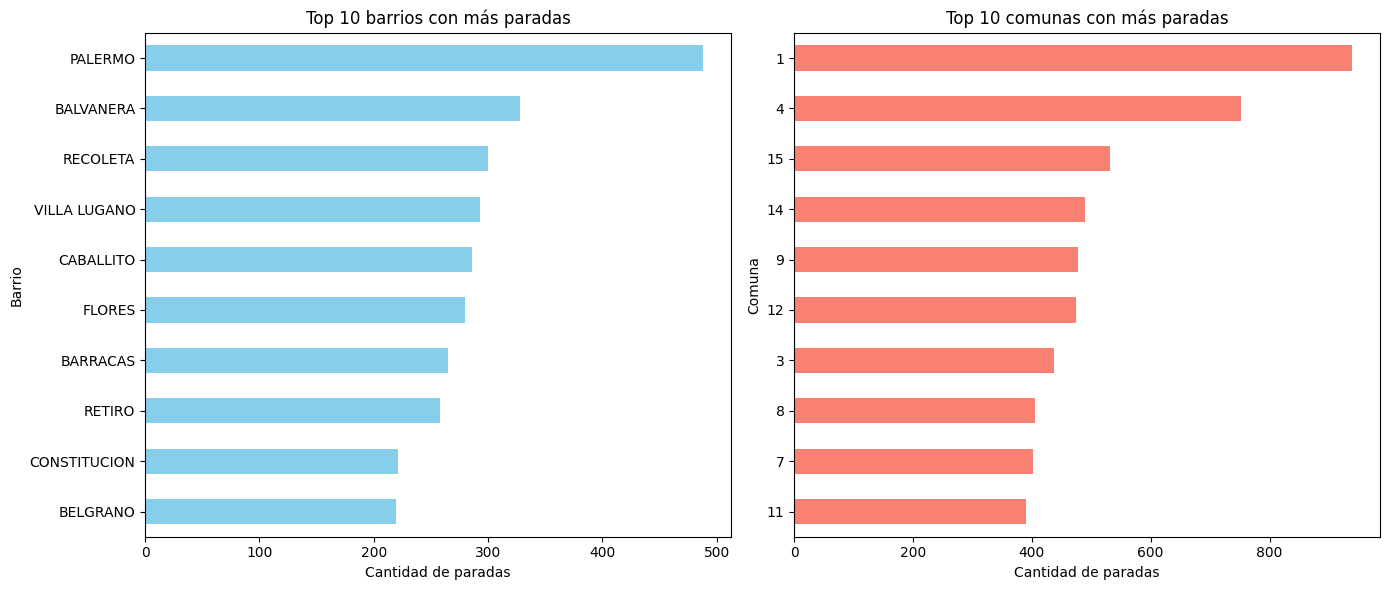

In [ ]:
# Top 10 barrios y comunas con más paradas
top_barrios = df_paradas["BARRIO"].value_counts().head(10)
top_comunas = df_paradas["comuna"].value_counts().head(10)

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barrios
top_barrios.sort_values().plot(kind="barh", ax=axes[0], color="skyblue")
axes[0].set_title("Top 10 barrios con más paradas")
axes[0].set_xlabel("Cantidad de paradas")
axes[0].set_ylabel("Barrio")

# Gráfico de comunas
top_comunas.sort_values().plot(kind="barh", ax=axes[1], color="salmon")
axes[1].set_title("Top 10 comunas con más paradas")
axes[1].set_xlabel("Cantidad de paradas")
axes[1].set_ylabel("Comuna")

plt.tight_layout()
plt.show()


Con el objetivo de identificar las comunas con mayor cobertura de transporte, se contabiliza la cantidad de líneas de colectivo que circulan por cada una de ellas.

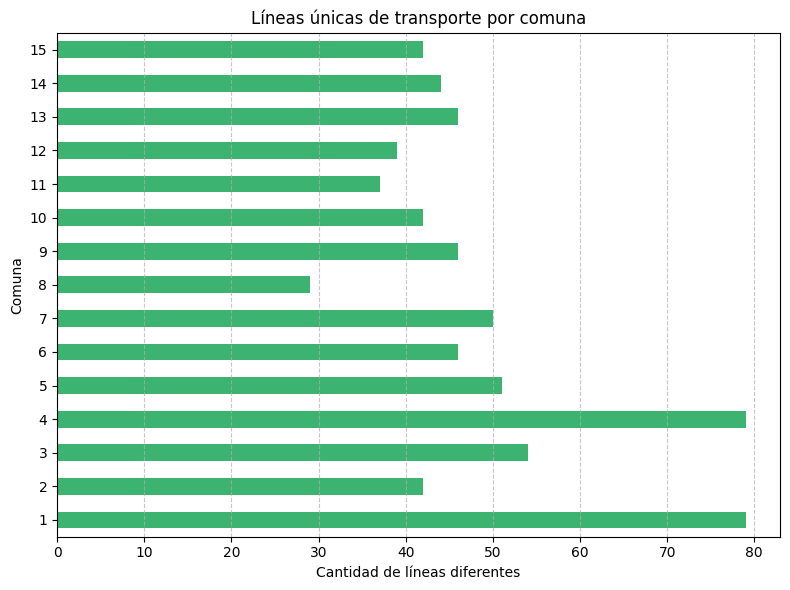

In [ ]:
# Lista de columnas de líneas
lineas_cols = ["L1", "L2", "L3", "L4", "L5", "L6"]

# Asegurar que todas las columnas sean numéricas
for col in lineas_cols:
    df_paradas[col] = pd.to_numeric(df_paradas[col], errors="coerce")

# Concatenar todas las líneas en una sola columna con su comuna
lineas_comuna = pd.concat([
    df_paradas[["comuna", col]].rename(columns={col: "linea"})
    for col in lineas_cols
])

# Eliminar nulos (paradas sin esa línea)
lineas_comuna.dropna(subset=["linea"], inplace=True)

# Convertir a entero si hace falta
lineas_comuna["linea"] = lineas_comuna["linea"].astype(int)

# Eliminar duplicados (misma línea repetida en la misma comuna)
lineas_comuna_unique = lineas_comuna.drop_duplicates()

# Contar líneas únicas por comuna
cant_lineas_por_comuna = lineas_comuna_unique["comuna"].value_counts().sort_index()

# Mostrar
# print("📊 Cantidad de líneas únicas por comuna:")
# display(cant_lineas_por_comuna)

cant_lineas_por_comuna.plot(kind="barh", color="mediumseagreen", figsize=(8,6))
plt.title("Líneas únicas de transporte por comuna")
plt.xlabel("Cantidad de líneas diferentes")
plt.ylabel("Comuna")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Se observa como la **comuna** 1 es la que representa una mayor cantidad de viajes mientras que tambien es la que cuenta con la mayor cantidad de lineas circulando.

En cuanto a los **barrios**, Palermo muestra una amplia diferencia en cantidad de pasajeros transportados respecto a los demás.

**Viajes en transporte público en CABA (solo colectivo)**

In [ ]:
df_viajes[["etapas_subte", "etapas_tren", "etapas_colectivo"]].sum()

,0
etapas_subte,782602
etapas_tren,1106647
etapas_colectivo,7871147


<Axes: title={'center': 'Uso de medios de transporte'}>

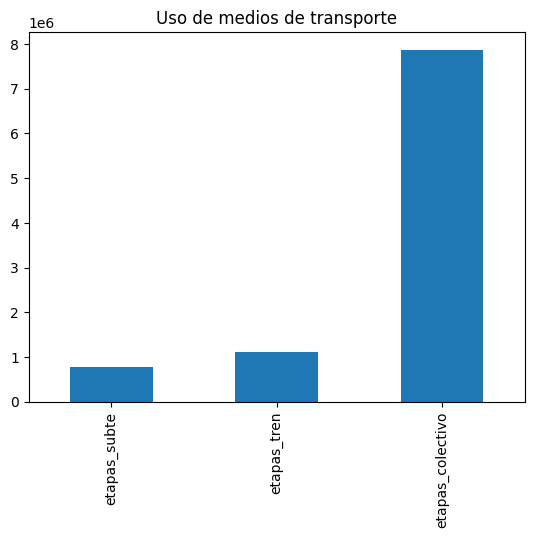

In [ ]:
df_viajes[["etapas_subte", "etapas_tren", "etapas_colectivo"]].sum().plot(kind="bar", title="Uso de medios de transporte")

Se muestra como la mayor cantidad de muestras es en colectivo. El análisis va a estar enfocado en este medio de transporte.

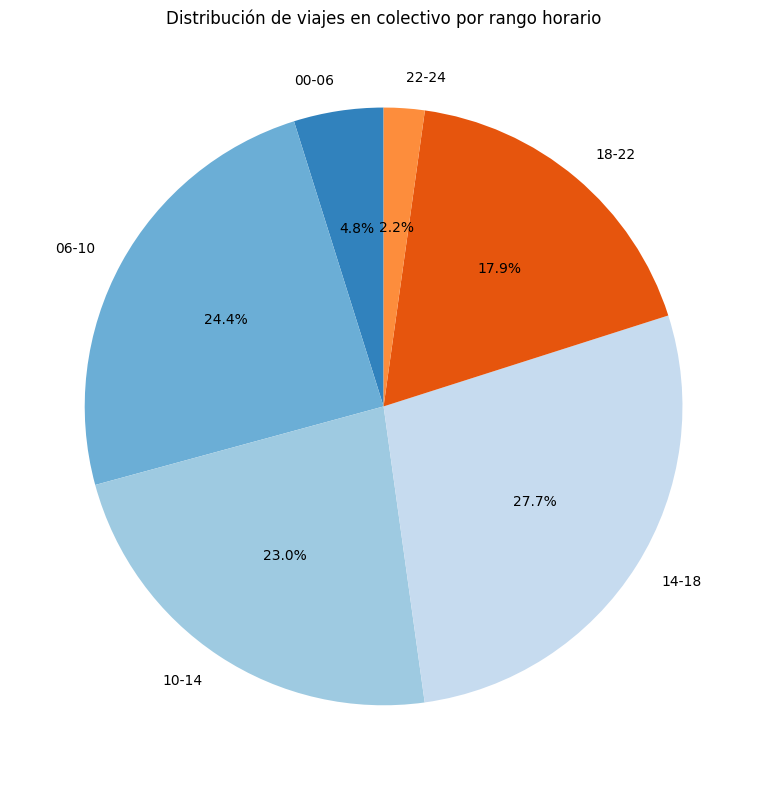

In [ ]:
# A partir de acá nos enfocamos únicamente en los viajes en colectivo
# Categorizar la hora en rangos
bins = [0, 6, 10, 14, 18, 22, 24]
labels = ["00-06", "06-10", "10-14", "14-18", "18-22", "22-24"]

df_colectivos["rango_horario_cat"] = pd.cut(df_colectivos["hora"], bins=bins, labels=labels, right=False)

# Conteo de viajes por rango horario
rango_counts = df_colectivos["rango_horario_cat"].value_counts().sort_index()

# Gráfico de torta
plt.figure(figsize=(8, 8))
rango_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=plt.cm.tab20c.colors)
plt.title("Distribución de viajes en colectivo por rango horario")
plt.ylabel("")  # Oculta la etiqueta del eje Y
plt.tight_layout()
plt.show()

In [ ]:
cant_ids = df_colectivos["id_tarjeta"].nunique()
print(f"🔢 Hay {cant_ids} tarjetas únicas en el dataset.")


🔢 Hay 2856765 tarjetas únicas en el dataset.


Aca obtenemos un valor indicativo de la cantidad de usuarios que usan los servicios de transporte en colectivo.

## Machine Learning
Ahora que ya tenemos finalizada la limpieza de datos e hicimos un análisis descriptivo de las caracteristicas, paramos a implementar modelos de Machine Learning

### Algoritmo de Clasificación (Comunas)

Como primer punto que se destaca, para poder hacer un análisis por comuna es necesario obtener la información de la comuna a partir de los datos de **Viajes en Colectivo**. Para eso, se implementaran distintos algoritmos de clasificación que puedan asignar a alguna de las 15 comunas los datos de latitud y longitud de origen del viaje. Se selecciona el algoritmo con mayor **accuracy** y esas predicciones se utilizan para completar el dataset.

In [ ]:
# 1. Preparación de datos de paradas ---
X_paradas = df_paradas_clean[['longitud', 'latitud']]
y_paradas = df_paradas_clean['comuna']

# 2. División 80/20 para entrenamiento y validación ---
X_train, X_test, y_train, y_test = train_test_split(
    X_paradas, y_paradas,
    test_size=0.2,
    random_state=42
)

# 3. Definición de modelos de clasificación ---
models_clasificacion = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

In [ ]:
# 4. Entrenar, predecir y mostrar métricas ---
for name, model in models_clasificacion.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))





=== KNeighborsClassifier ===
Accuracy: 0.9189

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       177
           2       0.94      0.91      0.92        67
           3       0.96      0.94      0.95        83
           4       0.96      0.94      0.95       150
           5       0.90      0.91      0.90        77
           6       0.82      0.82      0.82        68
           7       0.90      0.88      0.89        90
           8       0.93      0.96      0.94        69
           9       0.93      0.90      0.91       105
          10       0.83      0.89      0.86        66
          11       0.95      0.85      0.90        82
          12       0.97      0.92      0.94       101
          13       0.94      0.92      0.93        73
          14       0.86      0.99      0.92        82
          15       0.88      0.90      0.89       103

    accuracy                           0.92      1393
   macro 

Entre ambos modelos resulta más conveniente el uso de Random Forest, dado que obtuvo un **accuracy** del **95,98%**

In [ ]:
# 5. Retrain final con el mejor modelo ---
final_clf = models_clasificacion["RandomForestClassifier"]
final_clf.fit(X_paradas, y_paradas)
print("\nRandomForestClassifier re-entrenado con el 100% de los datos de paradas.")


RandomForestClassifier re-entrenado con el 100% de los datos de paradas.


Con el modelo ya definido, se usa para hacer la predicción y clasificar las comunas del df_colectivos. Se agrega una columna adicional (comuna_origen) mostrando los resultados.

In [ ]:
# 6. Predicción de comuna de origen en viajes ---
X_pred_comunas = (
    df_colectivos[['lon_o', 'lat_o']]
    .rename(columns={'lon_o': 'longitud', 'lat_o': 'latitud'})
)
df_colectivos['comuna_origen'] = final_clf.predict(X_pred_comunas).astype(int)

print("Asignación de comunas completada. Muestra de resultados:")
display(df_colectivos[['hora', 'lon_o', 'lat_o', 'comuna_origen']].head())

Asignación de comunas completada. Muestra de resultados:


,hora,lon_o,lat_o,comuna_origen
0,13,-58.386578,-34.859386,4
1,19,-58.346651,-34.818039,4
2,12,-58.341648,-34.818089,4
3,8,-58.325080,-34.791210,4
4,6,-58.369806,-34.814528,4


### Algoritmo de Regresión (Cantidad Viajes)

Teniendo ya las comunas asignadas, se pasa a implementar un algoritmo de regresión para predecir la demanda segun una **hora** y **comuna determinada**. Se prepara un nuevo df (df_demanda) con la cantidad de viajes que se realizaron en una determinada comuna a una determinada hora.

In [ ]:
# --- DataFrame de Demanda ---

# 1. Agrupar por 'comuna_origen' y 'hora' y contar la cantidad de viajes
df_demanda = df_colectivos.groupby(['comuna_origen', 'hora']).size().reset_index(name='cantidad_viajes')

# 2. Ordenar los datos
df_demanda.sort_values(by=['comuna_origen', 'hora'], inplace=True)

print("\n--- DataFrame final para el modelado ---")
df_demanda.info()
display(df_demanda.head(10))

# 3. Guardar el dataset limpio
df_demanda.to_csv('demanda_colectivos_limpio.csv', index=False)


--- DataFrame final para el modelado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   comuna_origen    360 non-null    int64
 1   hora             360 non-null    int64
 2   cantidad_viajes  360 non-null    int64
dtypes: int64(3)
memory usage: 8.6 KB


,comuna_origen,hora,cantidad_viajes
0,1,0,2263
1,1,1,1205
2,1,2,508
3,1,3,344
4,1,4,920
5,1,5,4288
6,1,6,9285
7,1,7,14512
8,1,8,13216
9,1,9,11329


Con el df armado, se preparan las variables para implementar el modelo de regresión. Para eso se determinan:


*   **X (Variables Predictoras):** comuna y hora
*   **Y (Variable Objetivo):** cantidad viajes



In [ ]:
# 1. Cargar el dataset de Demanda
try:
    df_demanda = pd.read_csv('demanda_colectivos_limpio.csv')
except FileNotFoundError:
    print("Error: No se encontró el archivo 'demanda_colectivos_limpio.csv'.")

# Preparo el nuevo modelos para regresion para predecir la demanda

# 2. Separar las variables: Features (X) y Target (y)
X = df_demanda[['comuna_origen', 'hora']]
y = df_demanda['cantidad_viajes']

print("Variables predictoras (X):")
display(X.head())
print("Variable objetivo (y):")
display(y.head())

Variables predictoras (X):


,comuna_origen,hora
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


Variable objetivo (y):


,cantidad_viajes
0,2263
1,1205
2,508
3,344
4,920


Se implementa una **regresión con Random Forest** y evalua su desempeño mediante métricas.

In [ ]:
# 80% para entrenamiento, 20% para prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Crear una instancia del modelo.
# n_estimators=100 -> 100 árboles de decisión.
model_regresion = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo con los datos de entrenamiento.
model_regresion.fit(X_train, y_train)

# El modelo entrenado para predecir la cantidad de viajes
y_pred = model_regresion.predict(X_test)

# 1. Calcular el R-cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# 2. Calcular el Error Cuadrático Medio (MSE) y la Raíz (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Evaluación del Modelo ---")
print(f"Coeficiente de Determinación (R²): {r2:.3f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

print(f"\nInterpretación:")
print(f"El modelo puede explicar aproximadamente el {r2:.1%} de la variabilidad en la cantidad de viajes.")
print(f"En promedio, las predicciones del modelo tienen un error de ±{rmse:.0f} viajes.")

--- Evaluación del Modelo ---
Coeficiente de Determinación (R²): 0.937
Error Cuadrático Medio (MSE): 41605172.28
Raíz del Error Cuadrático Medio (RMSE): 6450.21

Interpretación:
El modelo puede explicar aproximadamente el 93.7% de la variabilidad en la cantidad de viajes.
En promedio, las predicciones del modelo tienen un error de ±6450 viajes.


Tambien se grafican los resultados de los valores reales vs predicciones del modelo. Se puede observar como en su mayoria los valores se ajustan al modelo.

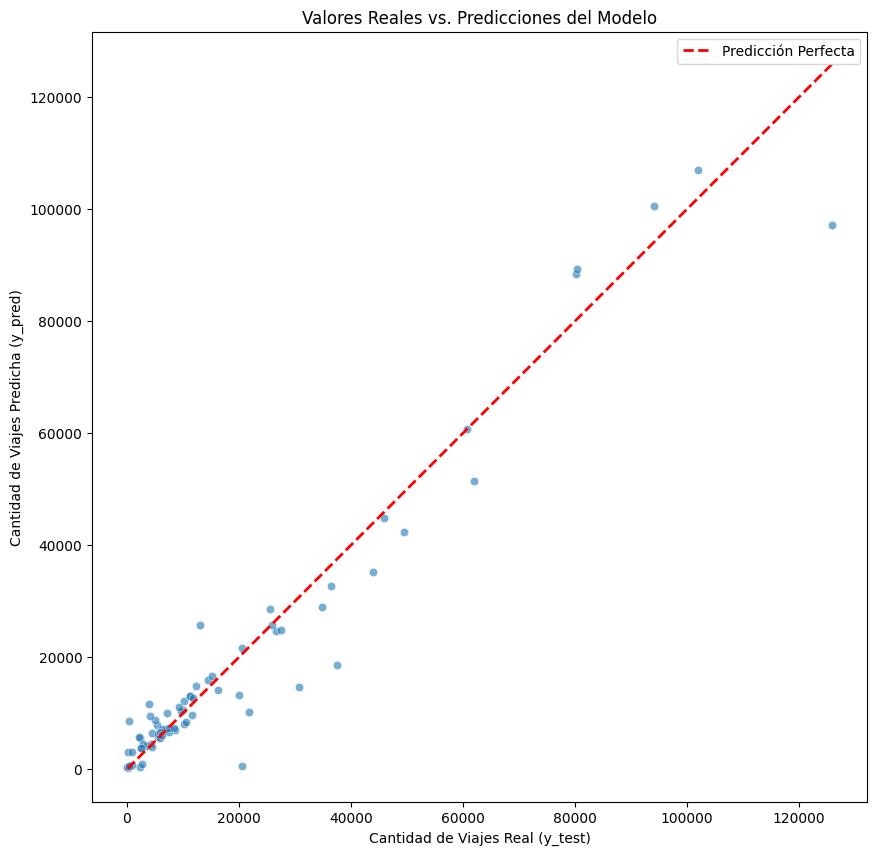

In [ ]:
results_df = pd.DataFrame({'Valores Reales': y_test, 'Predicciones': y_pred})

plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_df, x='Valores Reales', y='Predicciones', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.title('Valores Reales vs. Predicciones del Modelo')
plt.xlabel('Cantidad de Viajes Real (y_test)')
plt.ylabel('Cantidad de Viajes Predicha (y_pred)')
plt.legend()
plt.axis('equal')
plt.show()

Para poder aplicar el modelo se incluye una interfaz que permite ajustar la hora del dia y la comuna. Al presionar "Predecir Demanda" calcula el valor de la predicción.

In [ ]:
comuna_slider = widgets.IntSlider(min=1, max=15, step=1, description='Comuna:')
hora_slider = widgets.IntSlider(min=0, max=23, step=1, description='Hora:')
predict_button = widgets.Button(description="Predecir Demanda")
output_label = widgets.Label()

def on_button_clicked(b):
    comuna = comuna_slider.value
    hora = hora_slider.value
    input_data = pd.DataFrame([[comuna, hora]], columns=['comuna_origen', 'hora'])
    # Realizar la predicción
    predicted_demand = model_regresion.predict(input_data)
    # Mostrar el resultado
    output_label.value = f'Demanda predicha: {int(predicted_demand[0])} viajes'

predict_button.on_click(on_button_clicked)

display(comuna_slider, hora_slider, predict_button, output_label)

IntSlider(value=1, description='Comuna:', max=15, min=1)

IntSlider(value=0, description='Hora:', max=23)

Button(description='Predecir Demanda', style=ButtonStyle())

Label(value='')

## Datos exportados
A raiz de las predicciones realizadas de los modelos, se exportan los resultados para que puedan ser luego consumidos desde fuentes externas. En este caso, los datos se usarán para elaborar un dashboard con **Looker Studio** (Google)

In [ ]:
# Conexión y autenticación
!pip install gspread google-auth-oauthlib google-auth-httplib2

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
# Guardado de archivos
df_demanda_looker = df_demanda.copy()

y_full_pred = model_regresion.predict(X)

df_resultados_looker = pd.DataFrame({
    'comuna_origen'   : X['comuna_origen'],
    'hora'            : X['hora'],
    'demanda_real'    : y.astype(int),
    'demanda_predicha': np.round(y_full_pred, 0).astype(int)
})

df_paradas_looker = df_paradas_clean[['latitud', 'longitud', 'comuna']].copy()

def df_to_gsheet(df, spreadsheet_name, worksheet_name):

    try:
        sh = gc.open(spreadsheet_name)
    except gspread.SpreadsheetNotFound:
        sh = gc.create(spreadsheet_name)

    try:
        worksheet = sh.worksheet(worksheet_name)
        worksheet.clear()
    except gspread.WorksheetNotFound:
        worksheet = sh.add_worksheet(title=worksheet_name, rows=1, cols=1)

    worksheet.update([df.columns.values.tolist()] + df.values.tolist())
    print(f"DataFrame '{worksheet_name}' subido a la Hoja de Cálculo '{spreadsheet_name}'")
    sh.share(None, perm_type='anyone', role='reader')
    return sh.url

spreadsheet_name = "TPO_Ciencia_Datos_Trasporte"
url_demanda = df_to_gsheet(df_demanda_looker, spreadsheet_name, "demanda_agregada")
url_resultados = df_to_gsheet(df_resultados_looker, spreadsheet_name, "resultados_modelo")
url_paradas = df_to_gsheet(df_paradas_looker, spreadsheet_name, "paradas_geo")

## Conclusiones

A lo largo de este proyecto se exploraron, analizaron y modelaron datos relacionados con el transporte público en la Ciudad Autónoma de Buenos Aires, con especial foco en el sistema de colectivos.

A partir de ello, se obtuvieron las siguientes conclusiones clave:

1. **Desbalance territorial y horario en la red de transporte**

Se evidenció un claro desequilibrio entre la distribución espacial de las paradas y la demanda efectiva de viajes. Algunas comunas presentan alta cobertura de líneas pero baja demanda de uso, mientras que otras muestran saturación horaria en franjas pico sin una oferta proporcional de líneas o frecuencias.

2. **Comunas con menor cobertura**

El análisis de las paradas por comuna permitió detectar zonas con baja densidad de líneas y accesibilidad reducida, lo que podría estar afectando negativamente la conectividad de ciertos barrios.

3. **Patrones temporales de demanda**

La mayoría de los viajes se concentran en horarios pico (06-10 hs y 14-18 hs), confirmando una estructura de movilidad centrada en jornadas laborales y escolares. Estos picos presentan riesgos de saturación operativa y representan oportunidades claras para redistribuir flota y ajustar frecuencias.

4. **Predicción de la demanda mediante modelos de machine learning**

Se implementó un modelo de regresión basado en Random Forest que logró predecir con buen desempeño la cantidad de viajes por hora y comuna. El modelo alcanzó un coeficiente de determinación (R²) del **93,7%**, mostrando que es factible anticipar la demanda y utilizar esta predicción para una planificación más eficiente.

Toda esta información relevada puede aplicarse en un posterior análisis para optimizar las rutas y frecuencias y mejorar el funcionamiento del sistema de transporte en CABA.